In [94]:
# Enable interactive plot
#%matplotlib notebook
%matplotlib inline


import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
from sklearn import datasets, linear_model
import matplotlib as mpl
from scipy.stats import linregress

import warnings

# Warnungen vom Typ DeprecationWarning ignorieren
warnings.filterwarnings("ignore")

import plotly.io as pio
pio.renderers.default = "notebook"

In [95]:
# set figures size
mpl.rcParams['figure.figsize'] = (12, 10)

# set font family to Arial


mpl.rcParams['font.family'] = 'Arial'



# Ändern der Standard-Schriftgröße für Titel


mpl.rcParams['axes.titlesize'] = 16



# Ändern des Standard-Abstands für den Titel global


mpl.rcParams['axes.titlepad'] = 20

mpl.rcParams['axes.titlelocation'] = 'left'

mpl.rcParams['axes.titleweight'] = 'bold'

mpl.rcParams['figure.titlesize'] = 20

mpl.rcParams['figure.titleweight'] = 'bold'



# Modify the default background color


plt.rcParams['figure.facecolor'] = '#e6e6e6'

plt.rcParams['axes.facecolor'] = '#e6e6e6'

# Setze die Achsenfarben in den rcParams
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'

x_tick_steps = 5

# Klimawandel in der Schweiz

In diesem Blogbeitrag geht es um den Klimawandel in der Schweiz. Der Klimawandel ist eine weltweit auftretende Veränderung des Klimas. Die mit dem Klimawandel verbundene Abkühlung oder Erwärmung kann über unterschiedlich lange Zeiträume erfolgen. Die Menschen fördern gegenwärtig mit dem Ausstossen von Treibhausgasen die Erderwärmung. In der Erdatmosphäre bewirken Treibhausgase wie Wasserdampf, Kohlenstoffdioxid, Methan einen Treibhauseffekt. Den atmosphärischen Treibhauseffekt kann man sich einfach vorstellen, wie die Erwärmung eines Gewächshauses. Sonneenstrahlen können in das System eindringen und Materie im Inneren erhitzen. Die umgesetzte Wärme verteilt sich im System durch Infrarotstrahlung und durch Konvektion der erwärmten Luft. In beiden Systemen bleibt jedoch die aufsteigende Warmluft im Inneren gefangen. Beim Gewächshaus stellt das Glasdach eine Barriere gegen die Konvektion dar und bei der Erde sorgt das Gravitationsfeld der Erde für den Erhalt der Warmluft in der Atmosphäre.

Eine spezielle Form des Klimawandels sind abrupte Klimawechsel. Sie wurden in der Erdgeschichte durch Eruptionen von Supervulkanen, grossflächigen Magmaausflüsse, stark erhöhte Treibhausgas-Emissionen, schnelle Veränderungen von Meeresströmungen oder durch kurzfristige Rückkopplungsprozesse im Klimasystem ausgelöst, oft in Verbindung mit biologischen Krisen beziehungsweise Massenaussterben.

Quelle: https://de.wikipedia.org/wiki/Klimawandel

Es ist wissenschaftlich nicht möglich, einzelne Wetterereignisse dem aktuellen Klimawandel zuzuschreiben, jedoch kann statistisch nachgewiesen werden, dass die globale Erwärmung die Wahrscheinlichkeit extremer Wetterereignisse erhöht.

**Zu den möglichen direkten Folgen des menschenverursachten Klimawandels gehören:**

- steigende Maximaltemperaturen
- steigende Minimaltemperaturen
- steigender Meeresspiegel
- höhere Meerestemperaturen
- zunehmende Starkniederschläge (Starkregen und Hagel)
- Zunahme des Anteils heftiger tropischer Wirbelstürme
- Zunahme von Trockenheit und Dürre
- Rückgang des arktischen Meereises und der Schneebedeckung
- Gletscherschwund und Gletscherrückgang
- tauender Permafrost

**Zu den möglichen indirekten Folgen des Klimawandel, die uns Menschen sowie unsere Umwelt betreffen, gehören:**

- Zunahme der Hunger- und Wasserkrisen insbesondere in Entwicklungsländern
- Existenzbedrohung durch Überschwemmungen und Waldbrände
- Gesundheitsrisiken durch Zunahme der Häufigkeit und Intensität von Hitzeextremen
- wirtschaftliche Folgen für die Beseitigung der Klimafolgeschäden
- weitere Verbreitung von Schädlingen und Krankheitserregern
- Verlust an Biodiversität durch begrenzte Anpassungsfähigkeit und -geschwindigkeit von Flora und Fauna
- Anpassungsnotwendigkeit in jeglichen Bereichen (z.B. Landwirtschaft, Forstwirtschaft, Energiewirtschaft, Infrastruktur, Tourismus, etc.)

Quelle: IPCC-Bericht von 2021


## Treibhausgase

Innerhalb von 20 Jahren ist die Wohnbevölkerung in der Schweiz um 1,5 Millionen gewachsen. Das entspricht einem Wachstum von ungefähr 21%. Im Durchschnitt wächst die Wohnbevölkerung in der Schweiz um 0.96%.

Hingegen die Treibhausgase pro Kopf sanken in der Schweiz in den letzten 20 Jahre um 2,12 Tonnen $CO_2$-eq.Das ist eine ungefähre Verringerung von Treibhausgasen pro Kopf von 34,7%. $CO_2$-eq ist die Summe aller Gase. Die Gase, die nicht $CO_2$ Emissionen sind, wurden ihrem globalen Erwärmungspotential (GWP) entsprechend, umgerechnet (IPCC, Fourth Assessment Report).


In [96]:
def nice_axes(ax, axis='x'):
    # ax.set_facecolor('.8')
    ax.tick_params(labelsize=10, length=0)
    ax.grid(True, axis=axis, color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]


def get_distance_to_next_text(fig, fig_tex, spacing=0.009):
    # get text bounding box in figure coordinates
    renderer = fig.canvas.get_renderer()
    bbox_text = fig_tex.get_window_extent(renderer=renderer)

    # Get x0 and x1 values from the bounding box
    x0, _ = bbox_text.get_points()[0]
    x1, _ = bbox_text.get_points()[1]

    # Get the DPI (dots per inch) of the figure
    dpi = fig.get_dpi()

    # Calculate the distance to the next text based on x1, DPI, and figure width
    distance_to_next_text = (x1 / dpi) / fig.get_figwidth() + spacing

    return distance_to_next_text


def calculate_trend_decision(data):
    # Berechnung der Trendlinie mit linearer Regression
    x = np.arange(len(data))
    slope, _, _, _, _ = linregress(x, data)
    # print(slope)

    # Treffen der Entscheidung basierend auf dem Trend
    if slope > 0.02:
        return "Positiv"
    elif slope < -0.02:
        return "Negativ"
    else:
        return "Kein"

In [97]:

df_b = pd.read_excel('Daten/Bevölkerungswachstum.xlsx', sheet_name='Tabelle1',)


fig = px.bar(df_b, x='Jahr', y='Ständige Wohnbevölkerung',
             color='CO2', color_continuous_scale=[(0, '#a4c639'), (0.5, "yellow"), (0.75, '#ffae42'), (1, "red")],
             hover_name="Jahr",
             title="Treibhausgasemissionen pro Kopf in der Schweiz",
             range_color=[0, 6.5])

fig.update_layout(coloraxis_colorbar=dict(
    title="Co2-eq pro Kopf in der Schweiz",
    thicknessmode="pixels", thickness=50,
    lenmode="pixels", len=350,
    yanchor="top", y=1,
    ticks="outside", ticksuffix=" Tonne Co2-eq",
    dtick=1
))

# fig.show()
fig.show()

1. $CO_2$-eq = Summe aller Gase; Nicht-$CO_2$-Emissionen wurden ihrem Globalen Erwärmungspotential (GWP) entsprechend umgerechnet (IPCC, Fourth Assessment Report).


Um Treibhausgase einzusparen, ist es relevant zu wissen, welche Verbrauchergruppe Treibhausgase verursacht. In der unteren Grafik ist ersichtlich, welche Verbrauchergruppe wie viel Tonnen $CO_2$-eq in den letzten 30 Jahre ausgestossen hat.


In [98]:
# {kex = colum name : [label, color, line style]}
colms_co2 = {'Total_co2a_1': ['Total 1.)', '#ffd700', '-'],
             'Energie_co2a': ['Energie (ohne Transport, inkl. Abfallverbrennung)', '#000000', '-'],
             'Transport_co2a': ['Transport (ohne internationalen Flugverkehr)', '#a52a2a', '-'],
             'Internationaler_Flug_co2a': ['Internationaler Flug- und Schiffsverkehr', '#ff1dce', '-'],
             'Industrielle_co2a': ['Industrielle Prozesse und Lösungsmittel', '#ffc40c', '-'],
             'Landnutzungsänderung_co2a': ['Landnutzungsänderung/Forstwirtschaft \ninkl. Holzprodukte', '#ff00ff', '-'],
             'Landwirtschaft_co2a': ['Landwirtschaft', '#8db600', '-'],
             'Abfall_co2a': ['Abfall (ohne Abfallverbrennung)', '#e30022', '-'],
             'Internationaler_Flug_co2a': ['Internationaler Flug- und Schiffsverkehr', '#ff1dce', '-'],
             }

# Neues Dictionary für die Umwandlung
colms_co2_transformed = {
    'column_header': list(colms_co2.keys()),
    'name': [value[0] for value in colms_co2.values()],
    'color': [value[1] for value in colms_co2.values()],
    'line_style': [value[2] for value in colms_co2.values()]
}

# Erstellen eines Pandas DataFrame
df_co2_columns = pd.DataFrame(colms_co2_transformed)

df_co2_con = pd.read_excel(
    'Daten\Treibhausgasemissionen_nach_verbrauchergruppen.xlsx', sheet_name='Tabelle1')
df_co2_con.set_index('Jahr', inplace=True)

df_co2_con = df_co2_con[df_co2_columns.column_header].rename(columns=dict(
    zip(df_co2_columns.column_header.values, df_co2_columns.name.values)))

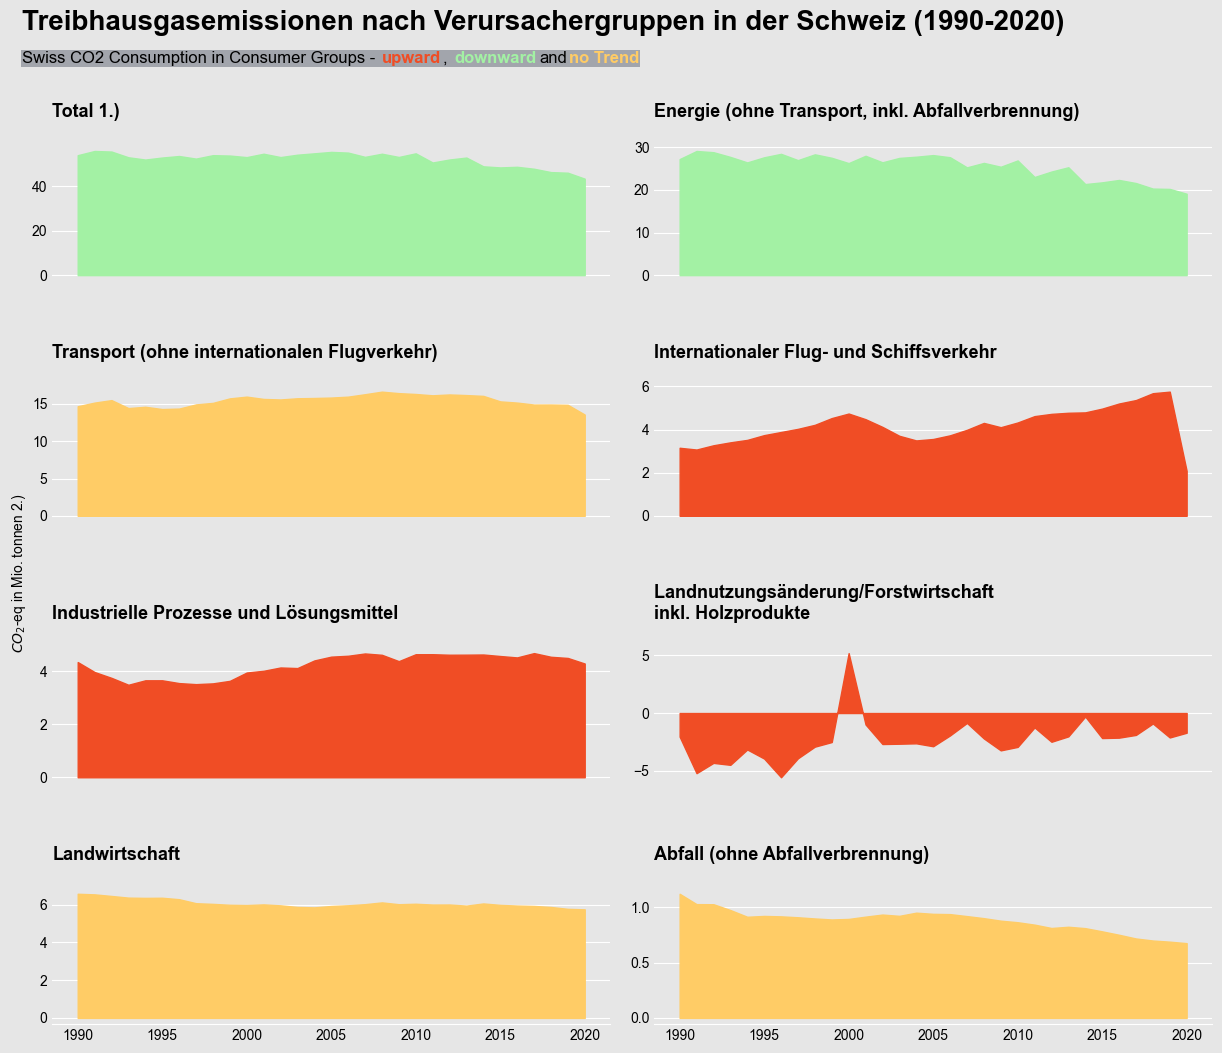

In [99]:

palette = {'Negativ': '#A3F1A4', 'Positiv': '#F04D25', 'Kein': '#ffcc66'}
text_col = 'black'

# Titel
title_text = f'Treibhausgasemissionen nach Verursachergruppen in der Schweiz ({df_co2_con.index[0]}-{df_co2_con.index[-1]})'
titel_x_pos = 0
titel_y_pos = 1.05

# Subtitel
# Define formatted strings for up and down
up_list = ['upward', palette['Positiv'], 'bold']
multi_and_list = [', ', text_col, "normal"]
and_list = ['and', text_col, "normal"]
down_list = ['downward', palette['Negativ'], 'bold']
end_list = ['no Trend', palette['Kein'], "bold"]
subtitle_list = [
    'Swiss CO2 Consumption in Consumer Groups - ', text_col, "normal"]
subtitle = [subtitle_list, up_list,
            multi_and_list, down_list, and_list, end_list]

subtitle_size = 12

subtitle_x_pos = 0
subtitle_y_pos = 1.01

subtitle_pos = [subtitle_x_pos, subtitle_y_pos]


fig, axes = plt.subplots(4, 2,  constrained_layout=True)

for ax, typs in zip(axes.ravel(), df_co2_con.columns):
    subset = df_co2_con[typs]

    trend = calculate_trend_decision(subset)

    ax.fill_between(df_co2_con.index, subset,
                    color=palette[trend], alpha=1)

    ax.set_xticks([])
    ax.tick_params(labelsize=8, length=0)

    # set subplot titel
    ax.set_title(typs, fontdict={
        'family': 'Arial', 'size': 13, 'weight': 'bold'})

    # ax.set_axisbelow(True)

    # ax.grid(axis='y', linestyle='-', linewidth=0.5,color=)
    nice_axes(ax, 'y')
    # Disable the axis spines.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Style the last three plots
    if ax in axes[3]:
        # Enabel axis spines for the last 3 ax
        ax.spines['bottom'].set_visible(True)
        # ax.spines['bottom'].set_color('white')
        # Set the color of the bottom spine
        # ax.spines['bottom'].set_color(caption_col)
        # Set custom x-axis ticks at positions 1995 and 2015
        # ax.set_xticks([1990, 2020])
        ax.set_xticks([x for x in range(1990, 2021, x_tick_steps)])
        # Set custom x-axis tick labels for the specified positions
        ax.set_xticklabels([x for x in range(1990, 2021, x_tick_steps)], fontdict={
                           'family': 'Arial', 'size': 10, })  # 'weight': 'bold','color':'white'

# Die schrift 'fa6-brands' ist nich standartmäsig instaliert
fig.suptitle(title_text, x=titel_x_pos,
             y=titel_y_pos,   ha='left', va='center')

fig.set_constrained_layout_pads(w_pad=0.1, h_pad=0.3)


# Create subtitle with multiple colors
for text_list in subtitle:
    fig_text = fig.text(subtitle_pos[0], subtitle_pos[1], text_list[0], color=text_list[1],
                        fontproperties={'family': 'Arial', 'size': subtitle_size, 'weight': text_list[2]}, bbox={'alpha': 0.3, 'facecolor': '#071126', 'boxstyle': 'square, pad=0.06', 'edgecolor': 'none'})
    x = get_distance_to_next_text(
        fig, fig_text, 0.0018)
    subtitle_pos = [x, subtitle_pos[1]]

# Beschriftung für die gesamte Figure (horizontal links ausgerichtet) hinzufügen
fig.text(-0.01, 0.5, '$CO_2$-eq in Mio. tonnen 2.)',
         horizontalalignment='left', verticalalignment='center', rotation='vertical')

plt.show()

1.) Ohne internationalen Flugverkehr und Landnutzungsänderung/Forstwirtschaft.

2.) $CO_2$-Äquivalente = Summe aller Gase; Nicht-$CO_2$-Emissionen wurden ihrem
Globalen Erwärmungspotential (GWP) entsprechend umgerechnet (IPCC, Fourth
Assessment Report).


Über dreiviertel der ausgestossen Treibhausgase kommen vom Sektor Transport und Energie. Der Energiesektor ist der einzige Sektor, der eine negative Tendenz aufweist. Die übrigen Sektoren sind stetig geblieben oder sogar ein bisschen gewachsen.

Die Verbrauchergruppe Landnutzungsänderung/Forstwirtschaft inkl. Holzprodukte baut als einzige Gruppe $CO_2$-eq ab. Dies liegt an den Pflanzen und der Photosynthese. Die Photosynthese wandelt Kohlenstoffdioxid zu Sauerstoff um. Am 26.12.1999 nahm der Orkan Lothar mit einer Geschwindigkeit von teilweise mehr als 170 km/h Kurs aufs Schweizer Mittelland. Der Sturm richtete in der Schweiz grosse Schäden an den Wäldern, deswegen musste im Jahr 2000 viel wieder aufgeforstet werden.

Die Corona Pandemie ist bei den Daten von Internationaler Flug- und Schiffsverkehr ersichtlich. Im Jahr 2019 stiess der Internationaler Flug- und Schiffsverkehr um die 5,76 Tonnen $CO_2$-eq aus, hingegen im Jahr 2020 nur noch um die 2,1 Tonnen $CO_2$-eq. Durch die Pandemie wurde in einem Jahr die $CO_2$-eq im Internationaler Flug- und Schiffsverkehr über 63% reduziert.


Im Jahr 2020 kamen 44% der ausgestossen Treibhausgasemissionen von der Energie verbrauchergruppe, das sind über 19 Tonne $CO_2$-eq. In dem Pie Diagramm wurde der Internationaler Flug- und Schiffsverkehr nicht berücksichtigt, weil wir in der Schweiz nur beding auf den Internationaler Flug- und Schiffsverkehr Einfluss nehmen können.


# Langfristige Klimastrategie der Schweiz


- **Bern, 28.08.2019 - Die Schweiz hat sich im Rahmen des Pariser Klimaübereinkommens verpflichtet, bis 2030 ihren Treibhausgasausstoss gegenüber dem Stand von 1990 zu halbieren**
- **Ab dem Jahr 2050 soll die Schweiz unter dem Strich keine Treibhausgasemissionen mehr ausstossen.**

  - bedeutet ein Gleichgewicht zwischen Emissionsquellen und -senken und umfasst alle international geregelten Treibhausgase (nicht nur $CO_2$);
  - schliesst sämtliche Sektoren des Treibhausgasinventars mit ein (Energie, Industrielle Prozesse und Produktenutzung, Landwirtschaft, Landnutzung, Landnutzungsänderungen und Forstwirtschaft (LULUCF), Abfall und Andere);
  - umfasst die Emissionen innerhalb der Schweizer Landesgrenzen (Territorial- bzw. Absatzprinzip);
  - beinhaltet zusätzlich auch die der Schweiz anrechenbaren Emissionen des internationalen Luftverkehrs und des internationalen Schiffsverkehrs;
  - legt keine bestimmten In- und Auslandsanteile für Emissionsverminderungen fest;
  - markiert ein Zwischenziel, wobei die weitere Entwicklung nach 2050 noch offen ist.
  - Der Landverkehr verursacht im Jahr 2050 mit wenigen Ausnahmen keine Treibhausgasemissionen mehr.

Das Ziel des Pariser Klimaübereinkommens ist die globale Erwärmung deutlich unter 2 Grad Celsius und wenn möglich auf 1,5 Grad Celsius zu beschränken. Aus wissenschaftlicher Sicht ist das Treibhausgasemissionen auf Netto-Null zwingen für das Erreichen des Pariser Klimaübereinkommens.

Falls Globenerwärmung weiter voranschreiten können Kosten im Jahr 2050 von 4% des jährlichen BIP wegen dem Klimawandel anfallen. Hingegen wenn das Globale Ziel von maximal 1,5 Grad Celsius erreicht würden, hätte die Schweiz im Jahr 2050 maximal kosten von 1,5% des BIP. Gemäss dieser Schätzung ist es für die Schweiz von hohem Interesse das Netto-Null Ziel zu erreichen, im Jahr 2050 läge der unterschied der Kosten bei 2,5% des BIP. 2,5% des jährlichen BIP sind ganz grob geschätzt 20-30 Milliarden Franken. Bei einer ungebremsten Klimaerwärmung wachsen die Kosten exponentiell.


### **Wie realistisch ist das Netto-Null Ziel?**


Die Daten zeigen es ist noch ein weiter Weg zu gehen für das Netto-Null ziel im Jahr 2050 zu erreichen. Im Jahr 2020 wurden immer noch 43,4 Millionen Tonnen $CO_2$-eq, 2030 ist das Ziel der Schweiz nur noch 26,98 Millionen Tonnen $CO_2$-eq auszustossen, somit soll in 10 Jahren 16,42 Millionen Tonnen $CO_2$-eq eingespart werden, das ist eine Reduktion von 37,8%. Für das Ziel im Jahr 2030 zu erreichen, wenn wir von einer Lineare $CO_2$-eq Abnahme ausgehen, muss jedes Jahr 1,64 Millionen Tonnen $CO_2$-eq eingespart werden.

Seit dem Jahr 1990 ist die Tendenz der Treibhausgasemissionen abnehmend, doch wen die Schweiz mit dem gleichen Bemühungen Treibhausgasemissionen einspart wie seit 1990 werden die Netto-Null ziel klar verfehlt. Das Übereinkommen von Paris wurde erst im Jahr 2017 ratifizierte. Die Lineare Regression seit 2018 zeigt den Trend seit 2018, falls die Schweiz weiter hin so viele Triebhausgase einspart wie seit 2018, könne das Ziel Netto-Null bis 2050 erreicht werden.


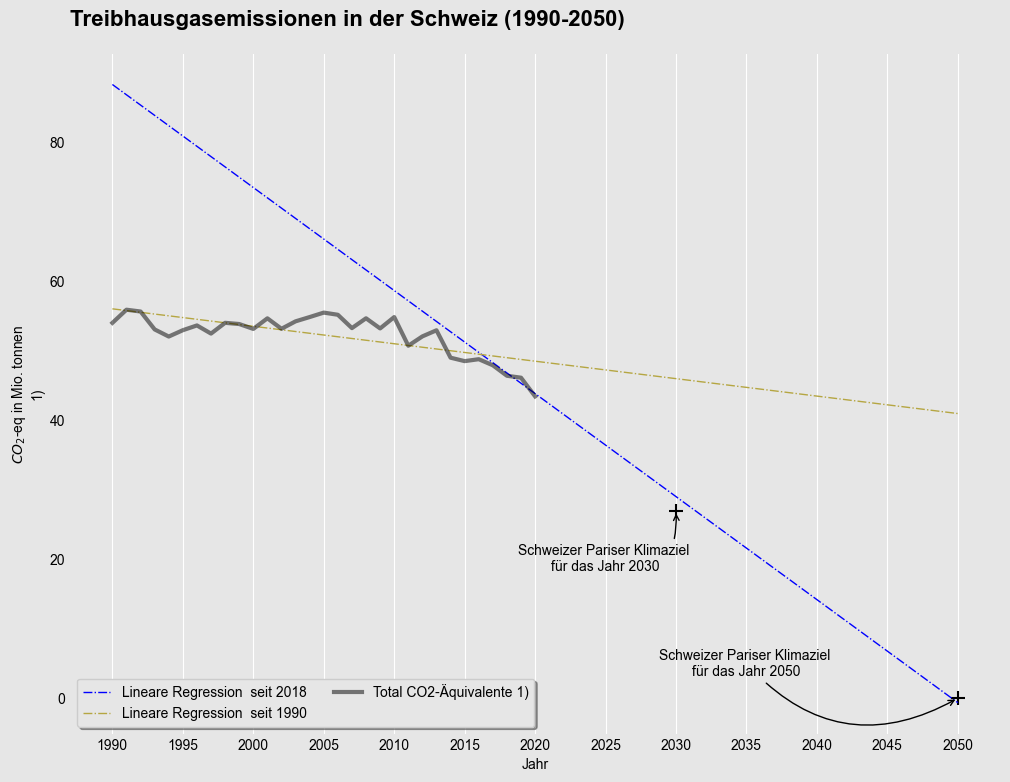

In [100]:
def intercept_slope_reg(x_reg, y_reg):
    x_reg = x_reg.reshape(-1, 1)
    regr = linear_model.LinearRegression()
    regr = regr.fit(x_reg, y_reg)
    slope = regr.coef_
    intercept = regr.intercept_
    return (slope, intercept)


def perdict_over_time(time_seies, slope, intercept):
    y_predicts = []
    for x in time_seies:
        y_predict = float(intercept) + float(slope) * x
        y_predicts.append(y_predict)
    return y_predicts


colmos_goal = {'Ziel': ['#e03c31', '-', 3, 'Netto-Null Ziel'],
               'progrnos_2018': ['#0000ff', '-.', 1, 'Lineare Regression  seit 2018'],
               'progrnos_1990': ['#b5a642', '-.', 1, 'Lineare Regression  seit 1990'],
               'Total_co2a_1': ['#000000', '-', 3, 'Total CO2-Äquivalente 1)']}


goal_2030 = df_co2_con.loc[1990, 'Total 1.)'] / 2
goal_2050 = 0

x_reg_2018 = np.array([2018, 2019, 2020]).reshape((-1, 1))
y_reg_2018 = df_co2_con.loc[[2018, 2019, 2020], 'Total 1.)'].values

x_reg_1990 = np.array([x for x in range(1990, 2021)]).reshape((-1, 1))
y_reg_1990 = df_co2_con.loc[[x for x in range(1990, 2021)], 'Total 1.)'].values

slope_2018, intercept_2018 = intercept_slope_reg(x_reg_2018, y_reg_2018)
slope_1990, intercept_1990 = intercept_slope_reg(x_reg_1990, y_reg_1990)

X_predict = range(1990, 2051)

Y_predict_2018 = perdict_over_time(X_predict, slope_2018, intercept_2018)
Y_predict_1990 = perdict_over_time(X_predict, slope_1990, intercept_1990)


fig, ax_goal = plt.subplots()

ax_goal.set_title(
    f'Treibhausgasemissionen in der Schweiz ({X_predict[0]}-{X_predict[-1]})')
ax_goal.set_xlabel('Jahr')
ax_goal.set_ylabel('$CO_2$-eq in Mio. tonnen \n1)')

nice_axes(ax_goal)


ax_goal.plot(X_predict, Y_predict_2018,
             color=colmos_goal['progrnos_2018'][0],
             label=colmos_goal['progrnos_2018'][3],
             ls=colmos_goal['progrnos_2018'][1],
             lw=colmos_goal['progrnos_2018'][2])

ax_goal.plot(X_predict, Y_predict_1990,
             color=colmos_goal['progrnos_1990'][0],
             label=colmos_goal['progrnos_1990'][3],
             ls=colmos_goal['progrnos_1990'][1],
             lw=colmos_goal['progrnos_1990'][2])

ax_goal.plot(df_co2_con.index, df_co2_con['Total 1.)'],
             color=colmos_goal['Total_co2a_1'][0],
             label=colmos_goal['Total_co2a_1'][3],
             ls=colmos_goal['Total_co2a_1'][1],
             lw=colmos_goal['Total_co2a_1'][2],
             alpha=0.5)

ax_goal.scatter(x=2030, y=goal_2030, color='black', marker='+', s=100)

anno_goal_2030 = ax_goal.annotate(xy=(2030, goal_2030),
                                  text="Schweizer Pariser Klimaziel \nfür das Jahr 2030",
                                  xytext=(2025, 20),
                                  ha='center', va='center',  # move the center of the annotation to the point
                                  arrowprops=dict(arrowstyle="->",
                                                  connectionstyle="arc3,rad=0.8"),
                                  zorder=99)

ax_goal.scatter(x=2050, y=goal_2050, color='black', marker='+', s=100)
anno_goal_2030 = ax_goal.annotate(xy=(2050, goal_2050),
                                  text="Schweizer Pariser Klimaziel \nfür das Jahr 2050",
                                  xytext=(2035, 5),
                                  ha='center', va='center',  # move the center of the annotation to the point
                                  arrowprops=dict(arrowstyle="->",
                                                  connectionstyle="arc3,rad=0.4"),
                                  zorder=99)


# ax_goal.legend(oc=(0,0))
legend = ax_goal.legend(loc='lower left', bbox_transform=fig.transFigure,
                        fancybox=True, shadow=True, ncol=2)  # (0,-0.15)
fig.subplots_adjust(bottom=0.2)

ax_goal.set_xticks([x for x in range(1990, 2055, x_tick_steps)])

plt.show()

1. $CO_2$-eq = Summe aller Gase; Nicht-$CO_2$-Emissionen wurden ihrem
   Globalen Erwärmungspotential (GWP) entsprechend umgerechnet (IPCC, Fourth
   Assessment Report).


Die Corona Pandemie hatte einen starken Einfluss ins Jahr 2020, in diesem Jahr wurden zum Vorjahr 2,7 Millionen Tonen $CO_2$-eq eingespart. Am meisten Treibhausgase wurden im Verkehrssektor eingespart, weil, unteranderem viel Menschen von zu Hause aus gearbeitet haben. Es wird endscheiden, wie sich die Zahlen in den nächsten Jahren entwickeln. Die meisten Treibhausgasse werden beim Verbrennen von Fossilen Energie träger erzeugt. Durch den Krieg in der Ukraine sind die Preise für Fossile Energien gestiegen. Durch den Preisanstieg von Fossilen Energien werden alternative Energien immer Lukrativer. Alternative Energien sind für die Schweiz nicht nur aus Finanzieller Sicht relevant, sondern auch für die Versorgungsicherheit der Schweiz.


## Energiestrategie 2050

Am 21. Mai 2017 wurde durch eine schweizweite Volksabstimmung, Massnahmen der Energiestrategie 2050 angenommen. Die Gesetzesrevision und die Verordnung der Energiestrategie 2050, traf am 1 Januar 2018 in Kraft. Das Energiegesetz dient dazu, den Energieverbrauch zu senken, die Energieeffizienz zu erhöhen und die erneuerbaren Energien zu fördern. Zudem wird der Bau neuer Kernkraftwerke verboten.

Wie fest der Energieverbrauch gesenkt werden soll, hat das Bundesamt für Energie Richtwerte veröffentlicht.

**Durchschnittlicher Energieverbrauch pro Person**

Senkung gegenüber Stand im Jahr 2000

- 16% im Jahr 2020
- 43% im Jahr 2035

**Durchschnittlicher Stromverbrauch pro Person**

Senkung gegenüber Stand im Jahr 2000

- 3% im Jahr 2020
- 13% im Jahr 2035

**Durchschnittliche inländische Produktion erneuerbare Energien ohne Wasserkraft**

- im Jahr 2020: 4’400 GWh
- im Jahr 2035: 11’400 GWh

**Wasserkraft**

- 37’400 GWh im Jahr 2035

Im November 2020 wurde der Bericht Energieperspektiven 2050+ veröffentlicht. In diesem Bericht werden verschieden Szenarien analysiert wie man das Netto-Null (Zero) erreichen kann, unter der Voraussetzung das die Versorgungsicherheit der Schweiz gewährleistet ist. In der Unteren Grafik wird das Szenario ZERO Basic und das Szenario Weiter wie bisher (WWB) geplottet, um zu schauen wie die Verordnungen der Energiestrategie 2050 eingehalten werden können.

Das Szenario ZERO Basic geht von einem heute absehbaren Trend der technologischen Entwicklung in der Zukunft aus. Das Szenario geht von einer frühen Steigerung der Energieeffizienz und einer deutlichen Elektrifizierung aus. Verbleibende Treibhausgasemissionen werden durch Senken oder durch negative Emissionstechnologien im In- oder Ausland kompensiert.

Bei Szenario WWB bildet die heute in Kraft gesetzten Instrumente der Energie- und Klimapolitik sowie die heutigen Marktbedingungen und sonstigen Rahmenbedingungen im Strommarkt ab (zum Stand 01.01.2019), dies als Vergleichsbasis zu den Varianten des Szenario Zero. Im Stromsektor erfolgt der Ausbau von erneuerbaren Energien, Wasserkraftwerken und sonstigen Kraftwerkskapazitäten ebenfalls unter Berücksichtigung bestehender Rahmenbedingungen.


In [101]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score, mean_absolute_percentage_error


class ARIMATimeSeriesForecast:
    def __init__(self, data, target_column):
        self.data = data
        self.target_column = target_column

    def fit(self, order=(3, 1, 2), test_size=0.3, forecast_steps=30):
        self.train, self.test = self.train_test_split(test_size)
        self.model = ARIMA(self.train[self.target_column], order=order)
        self.model = self.model.fit()

        self.prediction_start = len(self.train)
        self.prediction_end = len(self.train) + \
            len(self.test) - 1 + forecast_steps

    def train_test_split(self, test_size):
        # Implementiere deine eigene Train-Test-Aufteilung
        # Hier ist ein einfaches Beispiel:
        train_size = int(len(self.data) * (1 - test_size))
        train, test = self.data[:train_size], self.data[train_size:]
        return train, test

    def set_index(self):
        new_index = []
        for index_value in range(self.test.index[0], self.test.index[0]+len(self.pred)):
            new_index.append(index_value)
        self.pred.index = new_index

    def predict(self):
        self.pred = self.model.predict(
            start=self.prediction_start, end=self.prediction_end, typ='levels')
        self.set_index()
        return self.pred

    def evaluate(self):
        r2 = r2_score(self.test[self.target_column],
                      self.pred[:len(self.test)])
        mape = mean_absolute_percentage_error(
            self.test[self.target_column], self.pred[:len(self.test)])
        return r2, mape

    def plot_results(self, titel, x_label='Date', y_label=''):
        forecast = self.model.get_forecast(
            steps=self.prediction_end - self.prediction_start + 1)
        lower_bound = forecast.conf_int()['lower ' + self.target_column].values
        upper_bound = forecast.conf_int()['upper ' + self.target_column].values

        r2, mape = self.evaluate()

        fig, ax = plt.subplots()
        ax.plot(self.pred.index, self.pred.values,
                color='red', label='Predicted Data')
        ax.plot(self.test.index,
                self.test[self.target_column], color='green', label='Test Data')
        ax.plot(self.train.index,
                self.train[self.target_column], color='black', label='Train Data')
        ax.fill_between(self.pred.index, lower_bound,
                        upper_bound, color='k', alpha=0.1)

        ax.set_title(
            f'{titel} ({self.train.index[0]} - {self.test.index[-1]})')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        ax.legend()
        ax.text(0.85, 0.3, f'$R^2$= {r2:.3f} \nMAPE= {mape:.3f}',
                transform=ax.transAxes, va='bottom')
        return fig, ax

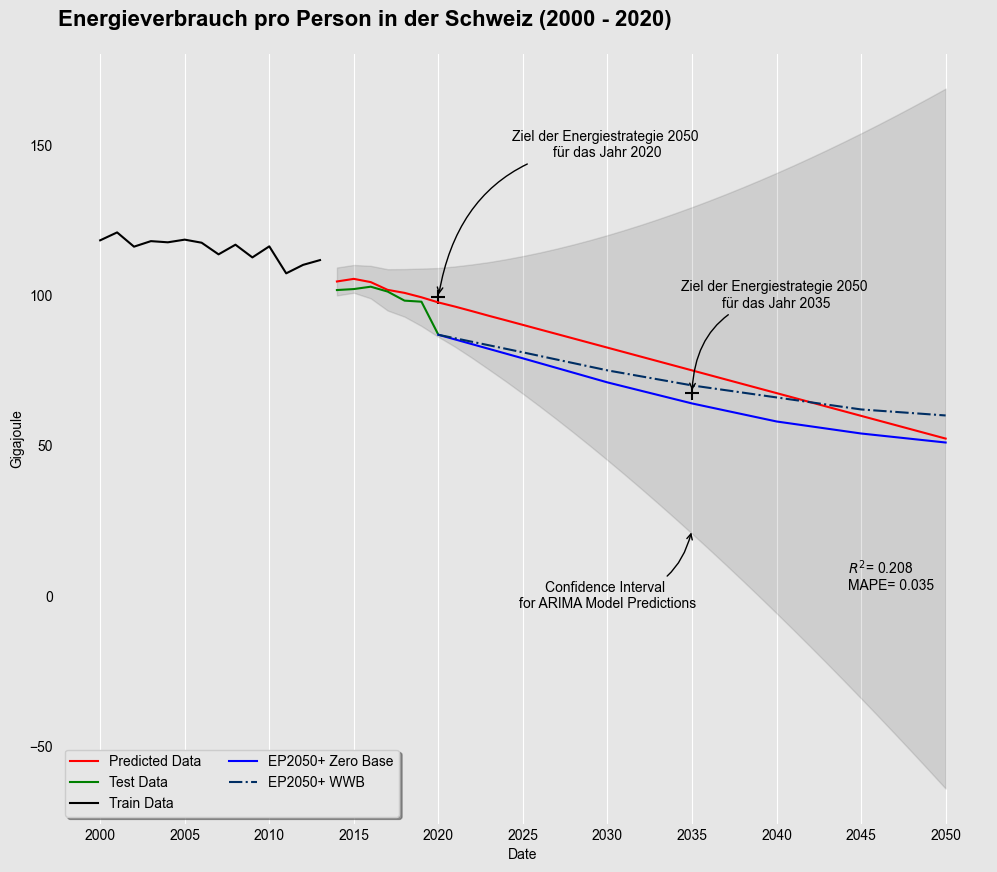

In [102]:
df_enver = pd.read_excel('Daten\Endenergieverbrauch_nach_Energieträger.xlsx', sheet_name='Tabelle1',
                         usecols=['Jahr', 'Brennstoffe', 'Treibstoffe', 'Elektrizität', 'Gas', 'Kohle',
                                  'Holz und Holzkohle', 'übrige Energieträger'])

try:
    df_enver.set_index('Jahr', inplace=True)
    df_b.set_index('Jahr', inplace=True)
except:
    pass

df_enver['Netto'] = df_enver.sum(axis=1)


df = pd.concat([df_b, df_enver], axis=1, join='outer')


df = df.sort_index().drop_duplicates().dropna(axis=0)
df['Total Therajoul'] = df['Netto'] * 1000
df['Gigajoule pro Person'] = df['Total Therajoul'] / \
    df['Ständige Wohnbevölkerung'] * 1000  # Umrechnen in GJ


df['Ziel der Energiestrategie 2050 für das Jahr 2020'] = df.loc[2000]['Gigajoule pro Person'] * 0.84
df['Ziel der Energiestrategie 2050 für das Jahr 2035'] = df.loc[2000]['Gigajoule pro Person'] * 0.57


ep_zBas_enver = {2025: 79, 2030: 71, 2035: 64, 2040: 58, 2045: 54, 2050: 51}

ep_wwb_enver = {2025: 81, 2030: 75, 2035: 70, 2040: 66, 2045: 62, 2050: 60}

ep_zBas_enver[2020] = df.loc[2020]['Gigajoule pro Person']
ep_wwb_enver[2020] = df.loc[2020]['Gigajoule pro Person']

ep_zBas_enver = {k: v for k, v in sorted(ep_zBas_enver.items())}
ep_wwb_enver = {k: v for k, v in sorted(ep_wwb_enver.items())}


x_gole = [x for x in range(2000, 2051)]


target_column = 'Gigajoule pro Person'
arima_forecast = ARIMATimeSeriesForecast(df, target_column)
arima_forecast.fit(order=(2, 2, 2), forecast_steps=30)
prediction = arima_forecast.predict()
r2, mape = arima_forecast.evaluate()
y_label = 'Gigajoule'
x_label = 'Date'
titel = 'Energieverbrauch pro Person in der Schweiz'

fig, ax = arima_forecast.plot_results(titel, x_label, y_label)

ax.scatter(x=2020, y=df['Ziel der Energiestrategie 2050 für das Jahr 2020'].unique(
), color='black', marker='+', s=100)

anno_goal_2030 = ax.annotate(xy=(2020, df['Ziel der Energiestrategie 2050 für das Jahr 2020'].unique()),
                             text="Ziel der Energiestrategie 2050 \nfür das Jahr 2020",
                             xytext=(2030, 150),
                             ha='center', va='center',  # move the center of the annotation to the point
                             arrowprops=dict(arrowstyle="->",
                                             connectionstyle="arc3,rad=0.4"),
                             zorder=99)


ax.scatter(x=2035, y=df['Ziel der Energiestrategie 2050 für das Jahr 2035'].unique(
), color='black', marker='+', s=100)

anno_goal_2030 = ax.annotate(xy=(2035, df['Ziel der Energiestrategie 2050 für das Jahr 2035'].unique()),
                             text="Ziel der Energiestrategie 2050 \nfür das Jahr 2035",
                             xytext=(2040, 100),
                             ha='center', va='center',  # move the center of the annotation to the point
                             arrowprops=dict(arrowstyle="->",
                                             connectionstyle="arc3,rad=0.4"),
                             zorder=99)

confidence_interval = ax.annotate(xy=(2035, 22),
                                  text="Confidence Interval \nfor ARIMA Model Predictions",
                                  xytext=(2030, 0),
                                  ha='center', va='center',  # move the center of the annotation to the point
                                  arrowprops=dict(arrowstyle="->",
                                                  connectionstyle="arc3,rad=0.4"),
                                  zorder=99)


ax.plot(ep_zBas_enver.keys(), ep_zBas_enver.values(),
        color='Blue',
        label='EP2050+ Zero Base')

ax.plot(ep_wwb_enver.keys(), ep_wwb_enver.values(),
        color='#002e63',
        label='EP2050+ WWB',
        ls='-.')

ax.legend(loc='lower left', bbox_transform=fig.transFigure,
          fancybox=True, shadow=True, ncol=2)

nice_axes(ax)

ax.set_xticks(range(2000, 2051, x_tick_steps))
plt.show()

Der Trend für den Energieverbrauch pro Kopf in der Schweiz ist fallend. Das Ziel der Energiestrategie 2050 wurde für das Jahr 2020 erreicht. Das Ziel für das Jahr 2020 war eine Senkung des Energieverbrauch pro Kopf um 16% zum Jahr 2000, dass ist eine Einsparung von 18.92 GJ pro Person.

Das Szenario WWB würde das Ziel der Energiestrategie 2050 für das Jahr 2035 knapp verpassen. Die Ziele Energiestrategie 2050 sind nur Richtwerte und nicht gesetzlich vorgeschrieben. Hingegen das Szenario ZERO Basic würde, wenn alles nach Plan verlaufen würde das Ziel für 2035 erreichen.


## Verlauf der Elektrizität


Weil die Elektrizität eine Erstsatz Energie für fossile Brennstoffe ist, ist es Interessant die Zahlen des Stromverbrauchs pro Kopf in der Schweiz anzuschauen. Bis ins Jahr 2006 wahr in der Schweiz der Stromverbrauch noch steigen. Seit den Letzenden Jahren hat es eine fallende Tendenz dies aus dem Grund weil viele Elektrogeräte immer Effizienter werden. Das Ziel der Energiestrategie 2050 wurde für das Jahr 2020 klar erreicht. Das Ziel für das Jahr 2020, einsparen von 3% zum Jahr 2000 wurde aber schon im Jahr 2014 erreicht. Als die Energiestrategie 2050 2018 in Kraft traf hätte jede in der Schweiz Lebende Person 0.28 kWh mehr verbrauchen könne und das ziel wäre immer noch erreicht gewesen.


In [103]:
def prognose_reg(x, reg_x, reg_y):
    y_prognose = []
    slope, intercept = intercept_slope_reg(reg_x, reg_y)
    for i in x:
        p = intercept + float(slope)*i
        y_prognose.append(round(p, 3))
    return y_prognose


def plot(ax, x, y):
    for i in y:
        if len(i) != 5:
            raise ValueError(
                f'y sind nicht alle werte gegeben [[data], coler, label,ls , lw ]: {i}')
        y_plot = i[0]
        coler = i[1]
        label = i[2]
        ls = i[3]
        lw = i[4]
        ax.plot(x,
                y_plot,
                color=coler,
                label=label,
                ls=ls,
                lw=lw)


def ckeck_gole(ax, x, y, titel, xlabel, ylabel, gole, range_gole, ymin, ymax, subplots_adjust=0.2, ticks=2, ncol=2):
    '''gole= ([[gole1,coler,label,ls,lw],[[golen,coler,label,ls,lw]])
        y = [[data],coler, label,ls,lw ]'''

    s_gole, e_gole = range_gole
    x_gole = [x for x in range(s_gole, e_gole)]
    x = np.array(x)

    plot(ax, x, y)
    for g in gole:
        g[0] = np.ones(len(x_gole)) * g[0]

    plot(ax, x_gole, gole)

    reg_x = x.reshape((-1, 1))

    reg_y = y[0][0]

    y_prog = prognose_reg(x_gole, reg_x, reg_y)
    ax.plot(x_gole, y_prog,
            color='red',
            label='Regressionsgerade',
            ls='-.')

    ax.set_title(titel)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.legend(loc='lower left', bbox_transform=fig.transFigure,
              fancybox=True, shadow=True, ncol=2)

    plt.subplots_adjust(bottom=subplots_adjust)
    plt.xticks([x for x in range(s_gole, e_gole, x_tick_steps)])
    plt.ylim(top=ymax)
    plt.ylim(bottom=ymin)
    nice_axes(ax)
    return ax

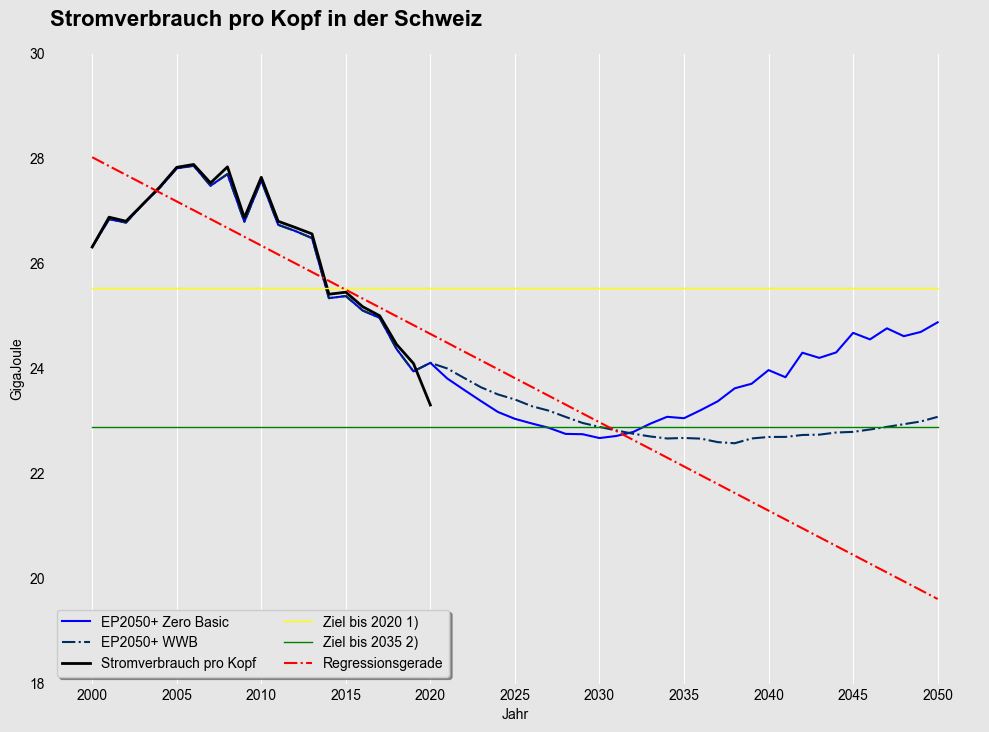

In [104]:

strom_ver = df_enver['Elektrizität']
strom_ver = strom_ver[-21:]
pers = df['Ständige Wohnbevölkerung']
# Sromverbrauch in GigaJoule pro Person
strom_pro_kopf = strom_ver / pers * 1000_000
x = strom_pro_kopf.index

df_EP2050_Strom = pd.read_excel('Daten/EP2050+Srtom.xlsx', sheet_name='Tabelle1',
                                usecols=['Jahr', 'Landesverbrauch  ZERO Basis Pro Person', 'Landesverbrauch WWB Pro Person'])

ep_zBas_stver = {2000: 56.3, 2019: 61.5, 2025: 62.5,
                 2030: 64.1, 2035: 67.4, 2040: 71.5, 2045: 74.6, 2050: 76}
ep_wwb_stver = {2000: 56.3, 2019: 61.5, 2025: 63.5,
                2030: 64.7, 2035: 66.3, 2040: 67.7, 2045: 68.9, 2050: 70.5}

prog_pers = [7_164_444, 8_544_527, 8_625_513, 9_180_500,
             9_817_000, 9_963_668, 10_110_334, 10_257_000]


def conTWhToGJ_proPers(dic, pers):
    z = 0
    for k in dic:
        dic[k] = dic[k] * 3600000 / pers[z]
        z += 1
    return dic


ep_zBas_stver = conTWhToGJ_proPers(ep_zBas_stver, prog_pers)
ep_wwb_stver = conTWhToGJ_proPers(ep_wwb_stver, prog_pers)

coler_strom = 'Black'
label_strom = 'Stromverbrauch pro Kopf'
ls = '-'
lw = 2

y = [[strom_pro_kopf.values, coler_strom, label_strom, ls, lw]]

titel = 'Stromverbrauch pro Kopf in der Schweiz'
xlabel = 'Jahr'
ylabel = 'GigaJoule'


ls_g = '-'
lw_g = 1

# print(y[0][0],len(y[0][0]))
gol_1_strom = y[0][0][0] * 0.97
label_g1 = 'Ziel bis 2020 1)'
coler_g1 = 'yellow'

gol_2_strom = y[0][0][0] * 0.87
label_g2 = 'Ziel bis 2035 2)'
coler_g2 = 'green'


gole = [[gol_1_strom, coler_g1, label_g1, ls_g, lw_g],
        [gol_2_strom, coler_g2, label_g2, ls_g, lw_g]]
range_gole = (2000, 2051)

ymin = 18
ymax = 30
subplots_adjust = 0.25

ncol = 1


fig, ax_strom_prog = plt.subplots()


ax_strom_prog.plot(df_EP2050_Strom['Jahr'], df_EP2050_Strom['Landesverbrauch  ZERO Basis Pro Person']/1.072071032878835,
                   color='Blue',
                   label='EP2050+ Zero Basic',
                   ls='-')
ax_strom_prog.plot(df_EP2050_Strom['Jahr'], df_EP2050_Strom['Landesverbrauch WWB Pro Person']/1.072071032878835,
                   color='#002e63',
                   label='EP2050+ WWB',
                   ls='-.')

ax_strom_prog = ckeck_gole(ax_strom_prog, x, y, titel, xlabel, ylabel,
                           gole, range_gole, ymin, ymax, subplots_adjust, x_tick_steps, ncol)

Ab dem Jahr 2030 wird wieder mit einem steigenden Stromverbrauch gerechnet, weil in der Schweiz mit der Elektromobilität den Verbrauch von Treibstoffen gesenkt werden sollen. Ein weiter Punkt, der den Stromverbrauch ansteigen lässt, ist die Umstellung von Konventionellen Öl- und Gasheizungen auf Wärmepumpen. Mit dem Szenario ZERO Basic wird deutlich mehr Strom verbraucht als beim WWE Der zusätzlich benötigte Strom soll durch erneuerbare Energien erzeugt werden.


### Elektrizitätserzeugung (GWh) in der Schweiz


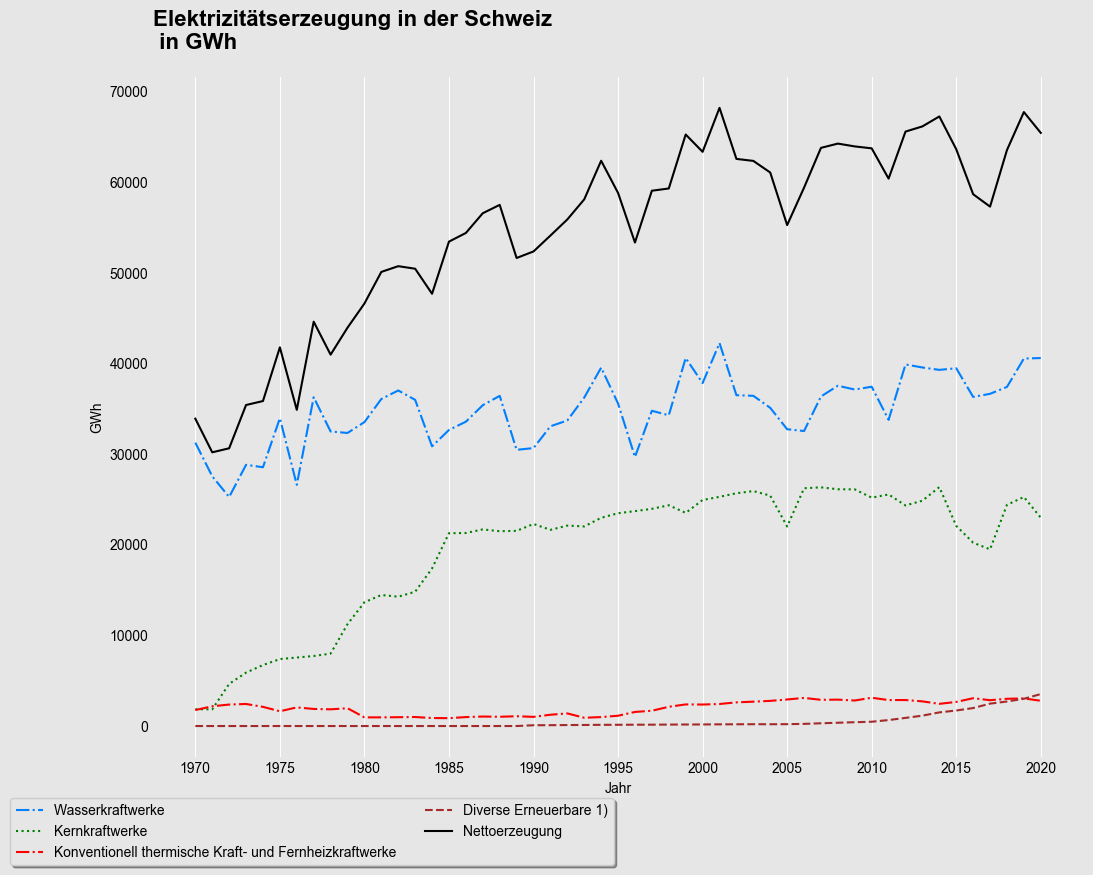

In [105]:
df_el = pd.read_excel(
    'Daten\Elektrizitätserzeugung_in_GWh.xlsx', sheet_name='Tabelle1')

try:
    df_el.set_index('Jahr', inplace=True)
except:
    pass


# 'Landeserzeugung (brutto) Verbrauch der Speicherladung',
# 'Landeserzeugung (brutto) total',
# 'Nettoerzeugung '
x = df_el.index
labels = ['Wasserkraftwerke ', 'Kernkraftwerke',
          'Konventionell thermische Kraft- und Fernheizkraftwerke',
          'Diverse Erneuerbare 1)', 'Nettoerzeugung '
          ]
colors_el = ['#007fff', '#008000', 'Red', '#a52a2a', '#000000']
line_stl_el = ['-.', ':', '-.', '--', '-']
index = labels
values = df_el.iloc[-1] - df_el.iloc[0]


fig, ax_el = plt.subplots()
i = 0
for k in labels:

    # values.append(df_el[k][-1]-df_el[k][0])
    ax_el.plot(x, df_el[k], label=k, color=colors_el[i], ls=line_stl_el[i])
    i += 1
# print(values)


legend = ax_el.legend(loc='lower left', bbox_transform=fig.transFigure,
                      fancybox=True, shadow=True, ncol=2, bbox_to_anchor=(0, 0.085))
plt.subplots_adjust(bottom=0.2)

nice_axes(ax_el)

ax_el.set_title(f'Elektrizitätserzeugung in der Schweiz \n in GWh')
ax_el.set_xlabel('Jahr')
ax_el.set_ylabel('GWh')


plt.xticks([x for x in range(1970, 2025, x_tick_steps)])
plt.show()

Seit 1970 wachst die Produktion von Strom in der Schweiz. In der Schweiz wird der Grösste Teil des Stroms durch Wasser gewonnen, am Zweit meisten Strom wird durch Kernkraft erzeugt. 91% der generierten Elektrizität stammen aus Wasser und Kernkraftwerke. Der betrieb beider Kraftwerke haben den Scheinbaren Vorteil, dass keine direkten CO2-Emissionen verursacht werden. Der genannte Vorteil ist aber sehr trügerisch, weil, die Treibhausgasemissionen sind größtenteils der Stromproduktion vor- und nachgelagert. Das Uran für Kernkraftwerke muss abgebaut, angereichert und für sehr lange Zeit endgelagert werden, bei all diesen Prozessen fallen Treibhausgasse an.

In der Schweiz werden nur knapp 4% der erzeugten Elektrizität mit konventionell thermische Kraft-, und Fernheizkraftwerke erzeugt. Unter konventionell thermische Kraft-, und Fernheizkraftwerke gelten fossile Kraftwerke wie, Kohle-, Öl- und Gase Kraftwerke.


### Elektrizitätsimport und -export der Schweiz


Die Analyse des Import- und Exportverhaltens von Strom in der Schweiz gibt Aufschluss darüber, ob die Schweiz ausreichend oder unzureichend Strom für ihren eigenen Bedarf produziert. Da die Schweiz auf Elektrizität als Energieträger setzt, um die $CO_2$-Äquivalente zu reduzieren, ist es von grosser Bedeutung sicherzustellen, dass die Schweiz genügend Strom erzeugt. Dies gewährleistet, dass der erzeugte Strom klimaneutral ist und nicht aus deutschen oder italienischen Gas- oder Kohlekraftwerken stammt.


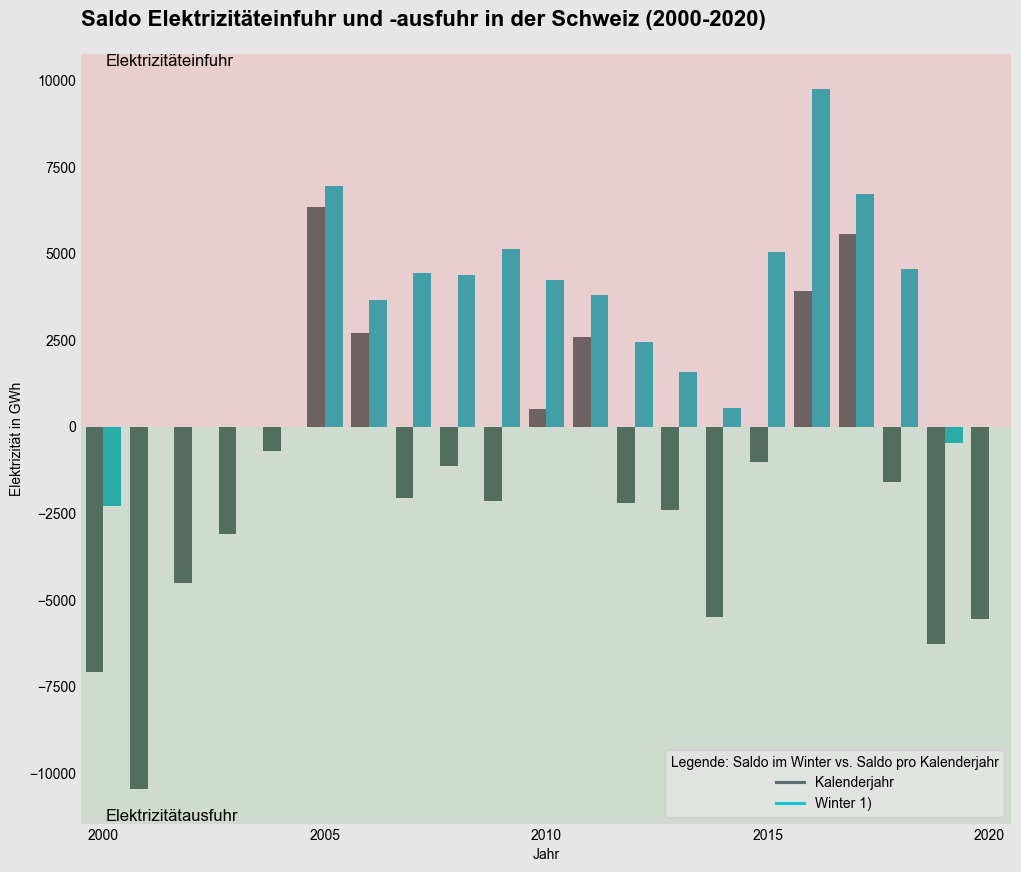

In [106]:
def clean_and_convert_to_int(df, columns_to_clean):
    """
    Cleans data in specified columns of a DataFrame.

    Args:
    - df: The input DataFrame.
    - columns_to_clean: A list of column names to clean and convert to int64.

    Returns:
    - A DataFrame with cleaned and converted columns.
    """
    # Make a copy of the input DataFrame to avoid modifying the original
    cleaned_df = df.copy()

    for column in columns_to_clean:
        # Replace non-integer values with NaN
        cleaned_df[column] = pd.to_numeric(cleaned_df[column], errors='coerce')

        # Convert to int64, handling NaN values as needed (e.g., filling with 0)
        cleaned_df[column] = cleaned_df[column].fillna(0).astype('int64')

    return cleaned_df


df_Energieeinfuhr_und_ausfuhr = pd.read_excel(
    'Daten\Energieeinfuhr_und_ausfuhr.xlsx', sheet_name='Tabelle1')

df_Energieeinfuhr_und_ausfuhr = clean_and_convert_to_int(
    df_Energieeinfuhr_und_ausfuhr, df_Energieeinfuhr_und_ausfuhr.columns.to_list())

try:
    df_Energieeinfuhr_und_ausfuhr.set_index('Jahr', inplace=True)
except:
    pass

# Dictionary mit Spaltennamen, Beschriftungen und Farben
columns_Energieeinfuhr_und_ausfuhr = {'Elektrizität_GWh.Sal': ['Kalenderjahr', '#5a6f70'],
                                      'Elektrizität_GWh.Winter': ['Winter 1)', '#17c4d1']}
# Columns selection
df_Energieeinfuhr_und_ausfuhr = df_Energieeinfuhr_und_ausfuhr[
    df_Energieeinfuhr_und_ausfuhr.index >= 2000]
df_Energieeinfuhr_und_ausfuhr = df_Energieeinfuhr_und_ausfuhr[list(
    columns_Energieeinfuhr_und_ausfuhr.keys())]

# Spaltennamen und Farben aus dem Dictionary extrahieren
column_names = list(columns_Energieeinfuhr_und_ausfuhr.keys())
column_labels = [value[0]
                 for value in columns_Energieeinfuhr_und_ausfuhr.values()]
column_colors = [value[1]
                 for value in columns_Energieeinfuhr_und_ausfuhr.values()]

df_melted = df_Energieeinfuhr_und_ausfuhr.reset_index()
# Melt-Funktion verwenden
df_melted = df_melted.melt(
    id_vars='Jahr', var_name='Saldo Elektrizitäteinfuhr und - ausfuhr', value_name='Elektrizität in GWh')


# Plot erstellen
plt.figure()
ax = sns.barplot(data=df_melted, x='Jahr', y='Elektrizität in GWh',
                 hue='Saldo Elektrizitäteinfuhr und - ausfuhr', palette=column_colors)


plt.title('Saldo Elektrizitäteinfuhr und -ausfuhr in der Schweiz (2000-2020)')
# Legendenbeschriftungen anpassen
legend = plt.legend(title='Legende: Saldo im Winter vs. Saldo pro Kalenderjahr',
                    labels=column_labels, loc='lower right', handlelength=2.0)

# Farben der Legendenmarkierungen anpassen
for i, handle in enumerate(legend.legendHandles):
    handle.set_color(column_colors[i])


# Alle x-Achsenbeschriftungen auf einer Liste
x_labels = df_melted['Jahr'].unique().tolist()

# Die x-Achsenbeschriftungen in 5-Schritt-Intervallen anzeigen
step = x_tick_steps
x_ticks = list(range(0, len(x_labels), step))
x_tick_labels = [x_labels[i] for i in x_ticks]

# Die Balken mit den x-Achsenbeschriftungen abgleichen
plt.xticks(ticks=x_ticks, labels=x_tick_labels)
# plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

ax.grid(True, axis='x', color='gray', alpha=0.1)
[spine.set_visible(False) for spine in ax.spines.values()]


ylim_min, ylim_max = ax.get_ylim()

ax.axhspan(0, ylim_max, facecolor='red', alpha=0.1)
ax.axhspan(0, ylim_min, facecolor='green', alpha=0.1)

ax.set_ylim(ylim_min, ylim_max)

nice_axes(ax)

# Text in "lower left" einfügen
plt.text(0.05, ylim_min, 'Elektrizitätausfuhr',
         fontsize=12, va='bottom', ha='left')

# Text in "upper right" einfügen
plt.text(0.05, ylim_max, 'Elektrizitäteinfuhr',
         fontsize=12, va='top', ha='left')


plt.show()

1. Winter gemäss hydrologischem Jahr. Ein Beispiel: Der Saldo für 2000 entspricht dem Winter 2000/01


Es ist offensichtlich, dass die Schweiz während der Wintermonate regelmäßig auf den Import von Strom angewiesen ist, um ihren Bedarf zu decken. Die Umstellung von herkömmlichen Öl- und Gasheizungen auf Wärmepumpen hat dazu geführt, dass der Winterstromverbrauch weiter zunimmt. Daher ist es von großer Bedeutung, während der Wintermonate effizient mit Strom umzugehen. Dieses Problem kann jedoch nicht allein durch Stromsparen gelöst werden. Es erfordert vielmehr klimaneutrale Lösungen für die Erzeugung und Speicherung von Strom während des Winters.

Die Schweiz steht vor der Herausforderung, die steigende Nachfrage nach Winterstrom durch nachhaltige und umweltfreundliche Energiequellen zu decken. Dies könnte den Ausbau erneuerbarer Energien, die Entwicklung von Speichertechnologien und die Stärkung der grenzüberschreitenden Energiezusammenarbeit mit den Nachbarländern umfassen.


# Schritte zur aktiven Veränderung


Selbst wenn der Klimawandel ein globales Problem ist,
können wir alle in der Schweiz einen entscheidenden Beitrag zur Bekämpfung des Klimawandels leisten.
Hier sind einige konkrete Handlungsaufforderungen, die jeder von uns umsetzen kann:

1. **Energieeffizienz steigern:** Reduziere deinen Energieverbrauch zu Hause durch den Einsatz energieeffizienter Geräte und Isolierung.

2. **Öffentliche Verkehrsmittel nutzen:** Nutze öffentliche Verkehrsmittel oder bilde Fahrgemeinschaften, um deinen individuellen CO2-Fussabdruck zu verringern.

3. **Erneuerbare Energien unterstützen:** Erwäge Investitionen in erneuerbare Energien wie Solar- oder Windkraft, um deinen eigenen Beitrag zur Reduzierung von Treibhausgasen zu leisten.

4. **Nachhaltige Ernährung praktizieren:** Bevorzuge lokale, saisonale Lebensmittel und reduziere den Konsum von Fleisch, um die Umweltauswirkungen der Lebensmittelproduktion zu minimieren.

5. **Politisch aktiv werden:** Engagiere dich politisch, unterstütze umweltfreundliche Politik und trage dazu bei, Veränderungen auf politischer Ebene herbeizuführen.


# Abschluss


Abschließend möchte ich betonen, dass der Klimawandel eine der drängendsten Herausforderungen unserer Zeit ist. Die Fakten und Daten in diesem Beitrag zeigen, dass wir drastische Veränderungen in unserem Verhalten und unserer Politik benötigen, um diesen globalen Bedrohungen entgegenzutreten.

Die Schweiz hat bereits Schritte unternommen, um ihren CO2-Ausstoss zu reduzieren, aber wir müssen noch mehr tun. Jeder kann seinen Teil dazu beitragen, sei es durch Energiesparen, nachhaltige Ernährung oder politische Beteiligung.

Es liegt an uns, die Zukunft unseres Planeten zu gestalten und sicherzustellen, dass kommende Generationen eine lebenswerte Welt erben. Die Kosten des Nichthandelns sind enorm, aber die Chancen, positive Veränderungen zu bewirken, sind ebenfalls groß.

Lasst uns gemeinsam handeln, um den Klimawandel einzudämmen und eine nachhaltige, blühende Zukunft zu sichern. Jeder Schritt, den wir unternehmen, zählt. Lasst uns die Veränderung sein, die wir in der Welt sehen wollen.
